In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import cv2
image_folder_path = '/content/drive/MyDrive/deteksi plat nomor/dataset'


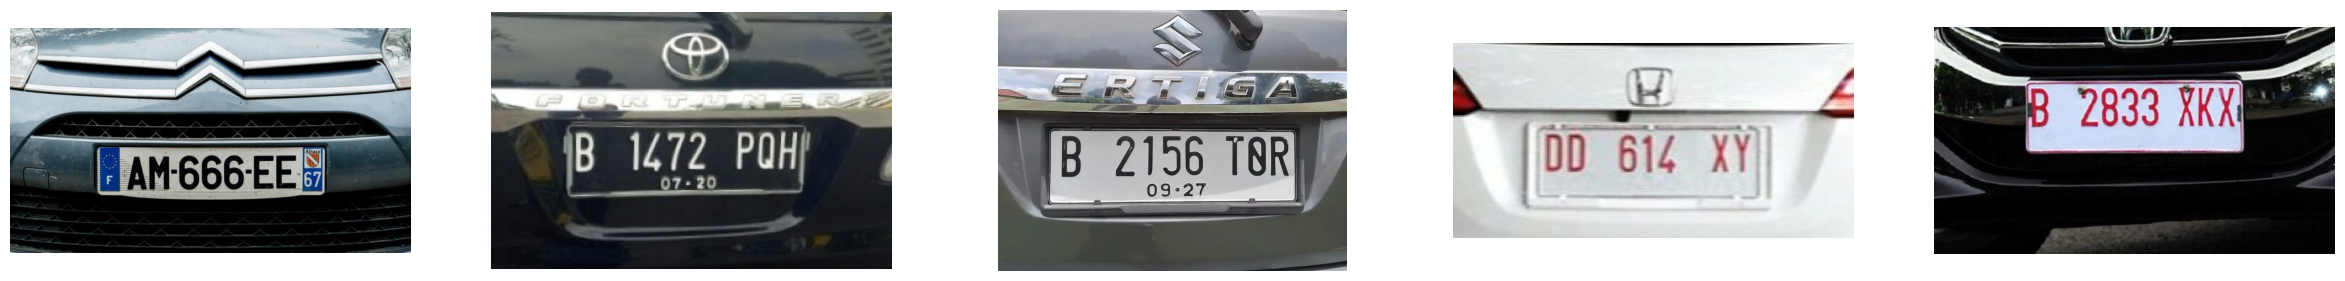

In [55]:
image_files = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path)]
X = [np.array(Image.open(image)) for image in image_files]
plt.figure(figsize=(30, 40))
for i in range(min(17, len(X))):
    plt.subplot(10, 5, i + 1)
    plt.axis('off')
    plt.imshow(X[i])
plt.show()

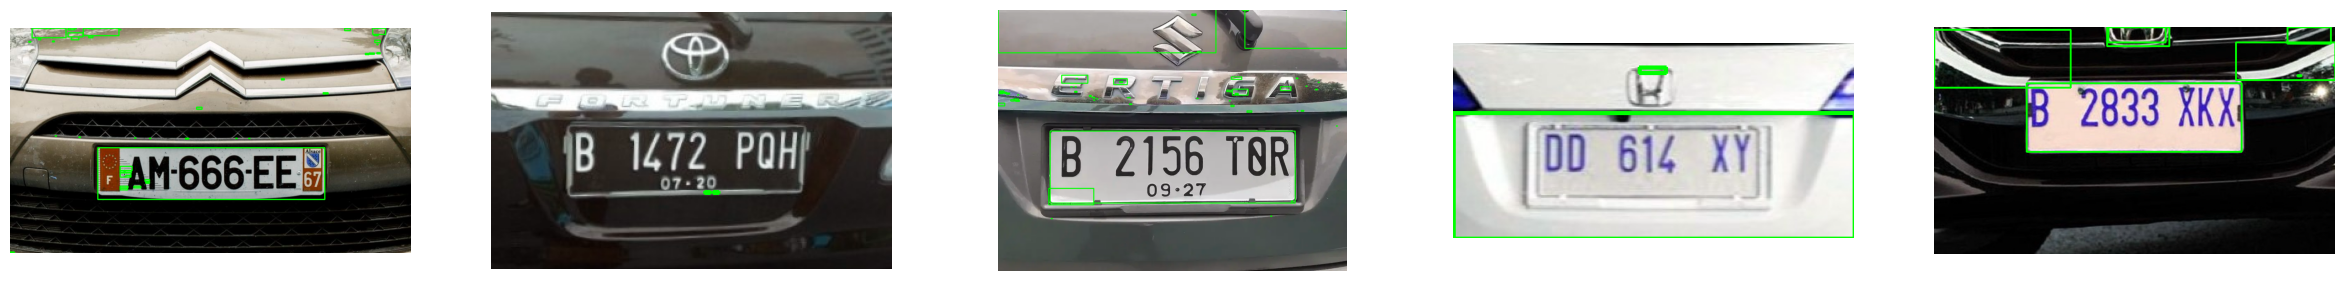

In [56]:
def detect_license_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        if 2 < aspect_ratio < 5:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image


plt.figure(figsize=(30, 40))
for i in range(min(17, len(X))):
    image_with_box = detect_license_plate(X[i].copy())
    plt.subplot(10, 5, i + 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.show()